<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/CIFAR10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_sample(X, y, index):
  plt.figure(figsize = (10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

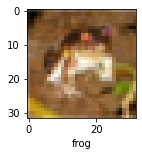

In [ ]:
plot_sample(X_train, y_train, 0)

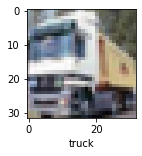

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(3000, activation='relu'),
                          keras.layers.Dense(1000, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
  optimizer='SGD',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.8098 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6198 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5378 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4778 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4300 - accuracy: 0.4960


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.4709 - accuracy: 0.4748


[1.4708905220031738, 0.4747999906539917]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(i) for i in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_class))

Classification report: 
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.65      0.58      0.61      1000
           2       0.39      0.31      0.35      1000
           3       0.35      0.33      0.34      1000
           4       0.54      0.26      0.35      1000
           5       0.28      0.54      0.37      1000
           6       0.50      0.56      0.53      1000
           7       0.63      0.46      0.53      1000
           8       0.55      0.65      0.60      1000
           9       0.64      0.45      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [ ]:
cnn = keras.Sequential([
                          # cnn
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                          keras.layers.MaxPooling2D((2,2)),
                          
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          
                          # dense
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4465 - accuracy: 0.4819
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0869 - accuracy: 0.6194
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9609 - accuracy: 0.6658
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8707 - accuracy: 0.6983
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8114 - accuracy: 0.7171
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7501 - accuracy: 0.7382
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6923 - accuracy: 0.7582
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6460 - accuracy: 0.7737
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6031 - accuracy: 0.7906
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9218 - accuracy: 0.7084


[0.9217549562454224, 0.7084000110626221]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

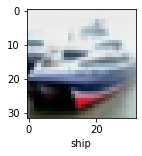

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.1740968e-05, 3.1794184e-06, 5.4748869e-04, 9.7240257e-01,
        1.2951148e-04, 2.4344672e-02, 1.5141426e-03, 1.1354678e-06,
        9.1700826e-04, 7.8552235e-05],
       [1.0142522e-03, 1.8450130e-03, 5.5520322e-09, 1.3674895e-08,
        1.6744441e-09, 5.3844221e-11, 1.5957708e-09, 6.7377277e-11,
        9.9691111e-01, 2.2962378e-04],
       [5.8728699e-02, 2.8818781e-02, 8.5673359e-04, 1.0875850e-02,
        3.5917098e-04, 1.2111771e-03, 2.3400338e-04, 7.8575080e-04,
        8.9452922e-01, 3.6005531e-03],
       [4.1602090e-01, 7.1586011e-04, 1.7921397e-04, 1.6426288e-04,
        1.5221336e-05, 3.4894906e-06, 1.4085042e-04, 1.2454337e-05,
        5.8238608e-01, 3.6169984e-04],
       [2.8702331e-07, 6.2719046e-05, 1.7870784e-02, 2.5949622e-02,
        2.4359080e-01, 3.3118993e-03, 7.0920777e-01, 2.8092431e-06,
        2.5642905e-06, 8.1193122e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

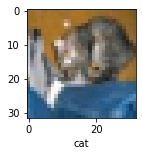

In [ ]:
plot_sample(X_test, y_test, 0)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.82      0.81      0.81      1000
           2       0.66      0.57      0.61      1000
           3       0.49      0.54      0.51      1000
           4       0.71      0.61      0.66      1000
           5       0.61      0.63      0.62      1000
           6       0.73      0.83      0.78      1000
           7       0.80      0.73      0.76      1000
           8       0.80      0.81      0.81      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

